## **Imersão Dados 4ª edição**

*Aluno:* <br>
* Lukas Barbosa Veiga de Melo, 25;
* Engenheiro Ambiental;
* Mestrando em Desenvolvimento e Meio Ambiente, UFPB.
<br>
<br>

**[LinkedIn](www.linkedin.com/in/lukas-veiga-79371b20a
)** <br>
**[GitHub](https://github.com/Lukasveiga)**

## **Dataset: House price data of São Paulo (Adaptado)**

*Variáveis:*

* Rua - Localização da Rua onde a casa pertence;
* Bairro - Localização do Bairro onde a casa pertence
* Cidade - Cidade onde a Casa está localizada;
* Metragem - Área da casa em metros quadrados;
* Quartos - Número de quartos na casa;
* Banheiros - Número de banheiros na casa;
* Vagas - Número de vagas na garagem;
* Valor - Preço da casa que está em moeda brasileira BRL;
<br>

**Fonte(Original):** https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo <br>
**Fonte(Adaptado):** https://gist.github.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891

In [1]:
# Bibliotecas básicas
import numpy as np
import pandas as pd

## Configuracões pandas
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Bibliotecas de Visualização
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Configurações de Visualização
sns.set_style('darkgrid')
sns.set_context('paper', font_scale= 1.2)

# Visualização de dados faltantes
import missingno as msno

In [2]:
# Importação do banco de dados
path = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
data = pd.read_csv(path)

# Primeiras linhas e formato do banco de dados (shape)
print(data.shape)
data.head(10)

(10008, 8)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


### **1.Sanity Check and Data Filtering**

In [3]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


**OBS:** Quando utilizamos a função `.info()` é possível verificar o tipo de dado para cada variável. Quando uma variável retorna o tipo como *objeto* é possível que exista algum erro ou valor faltante principalmente se para essa variável é esperado um tipo inteiro(int) ou flutuante(float), sendo necessário verificar mais a fundo essas variáveis.

In [4]:
# Verificando os dados da variável 'Valor'
data['Valor'].sample(10)

222        R$ 660.000
4290    R$ 15.000.000
5082     R$ 5.000.000
6919       R$ 839.000
2532    R$ 15.499.000
9832     R$ 1.950.000
8198     R$ 6.000.000
5632     R$ 1.700.000
732        R$ 380.000
6618     R$ 1.350.000
Name: Valor, dtype: object

* Observando diferentes amostras da série 'Valor' é possível notar que existe valores referentes a um aluguel diário, mensal ou anual que difere do comportamento esperado de venda.

In [5]:
# Separando os dados da Série 'Valor' com a função split + expand
valor_split = data['Valor'].str.split(expand = True)
valor_split

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [6]:
# Verificando os dados para cada coluna criada com o método split + expand
for i in range(0,3):
    print(valor_split[i].unique())

['R$']
['7.000.000' '3.700.000' '380.000' ... '553.000' '951.000' '2.200']
[None '/Mês' '/Ano' '/Dia']


In [7]:
# Atualizando o dataframe original com os novos valores separados
data[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = data['Valor'].str.split(expand = True)

data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


**OBS:** Como desejamos para esse projeto criar um modelo de regressão que faça a predição dos valores de vendas iremos filtrar os valores de aluguel.

In [8]:
# Novo dataframe com apenas os valores de venda dos imóveis
data_vendas = data[data['Tipo_anuncio'].isnull()]

# Também iremos remover as colunas 'Valor', 'Moeda' e 'Tipo_anuncio'
data_vendas = data_vendas.drop(['Valor', 'Moeda', 'Tipo_anuncio'], axis = 1)

print(data_vendas.shape)
data_vendas.head()

(9156, 8)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


In [9]:
# Transformando os dados da coluna 'Valor_anuncio' para o formato float
data_vendas['Valor_anuncio'] = data_vendas['Valor_anuncio'].str.replace('.', '').astype('float')

data_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor_anuncio  9156 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 643.8+ KB


/tmp/ipykernel_136221/712752553.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_vendas['Valor_anuncio'] = data_vendas['Valor_anuncio'].str.replace('.', '').astype('float')


In [10]:
# Verificando dados faltantes
data_vendas.isnull().sum()

Rua              3049
Bairro             10
Cidade              0
Metragem            0
Quartos             0
Banheiros           0
Vagas               0
Valor_anuncio       0
dtype: int64

<AxesSubplot:>

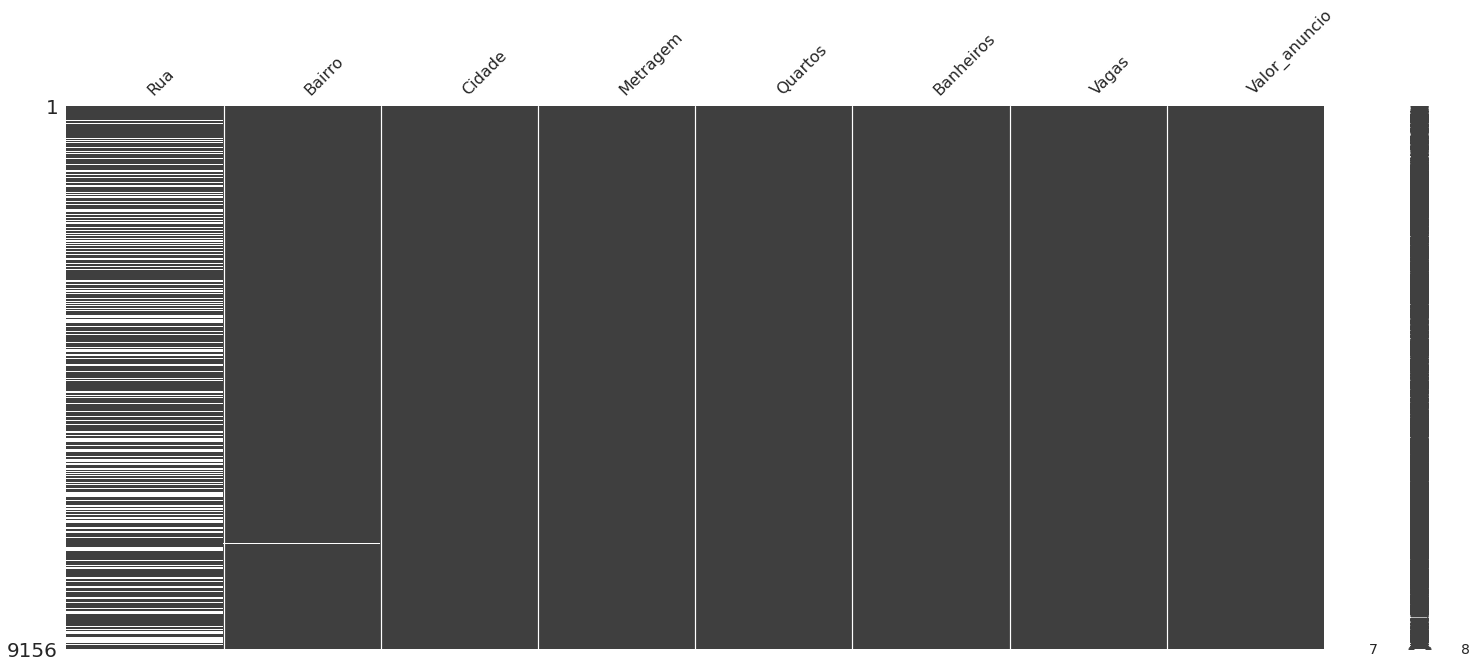

In [11]:
# Matrix msno
msno.matrix(data_vendas)

In [12]:
# Ruas sem o nome do Bairro
data[data['Bairro'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,R$ 9.800\n /Mês,R$,9.800,/Mês
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,R$ 640.000,R$,640.000,None
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,R$ 6.895.000,R$,6.895.000,None
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,R$ 4.000.000,R$,4.000.000,None
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,R$ 3.890.000,R$,3.890.000,None
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000,R$,6.895.000,None
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000,R$,6.895.000,None
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000,R$,4.000.000,None
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês,R$,30.000,/Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000,R$,4.000.000,None


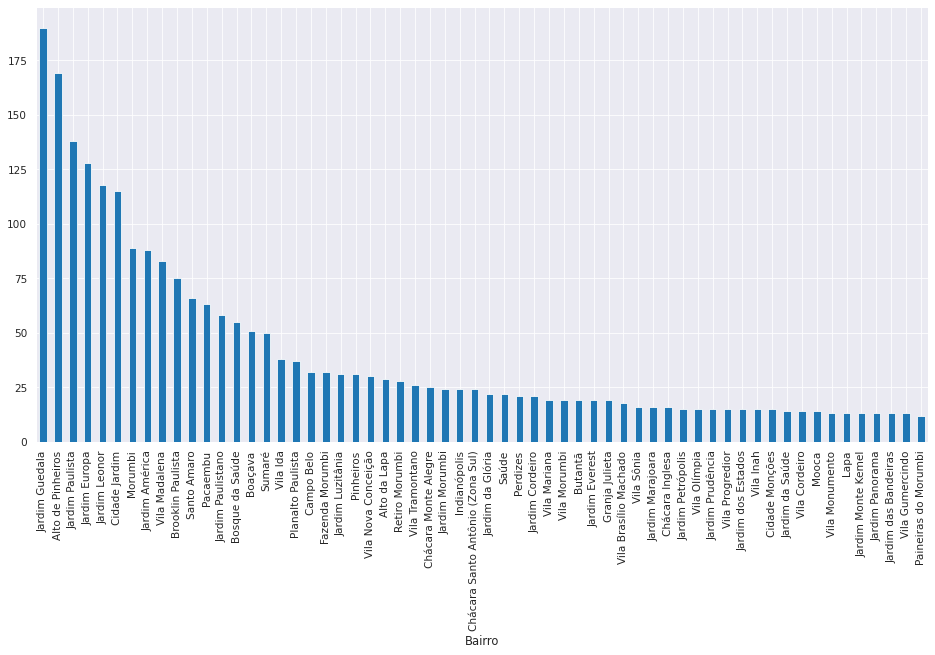

In [13]:
# Bairros sem o nome da rua, 60 maiores valores para melhor visualização
(data[data['Rua'].isnull()]
 .value_counts('Bairro')[:60]
 .plot(kind = 'bar', figsize = (16,8)));

### **2.Análise Explanatório dos Dados (EDA)**

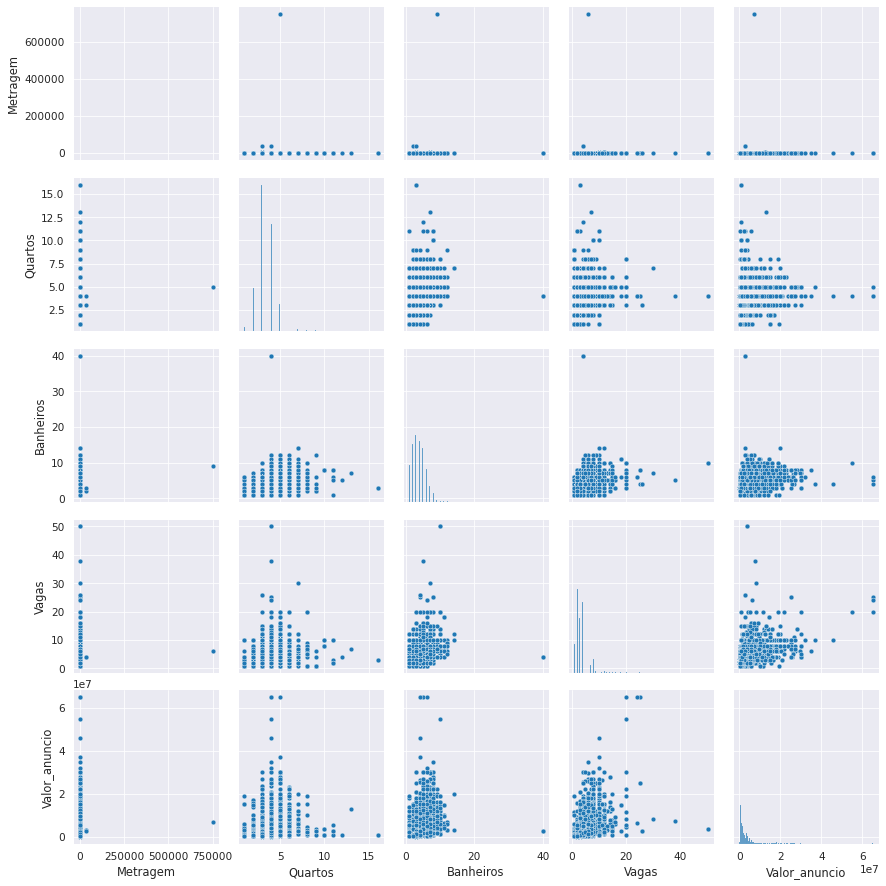

In [14]:
# Inicialmente utilizaremos a funcao 'pairplot' da biblioteca seaborn para visualizar de forma geral correlações entre variáveis e também a distribuição
sns.pairplot(data_vendas)

* A princípio não é possível observar nenhuma correlação positiva ou negativa que sejam relevantes, porém isso pode ser ocasionado pela presença de valores 'outliers' que acabam interferindo negativamente na análise de correlação entre as variáveis.

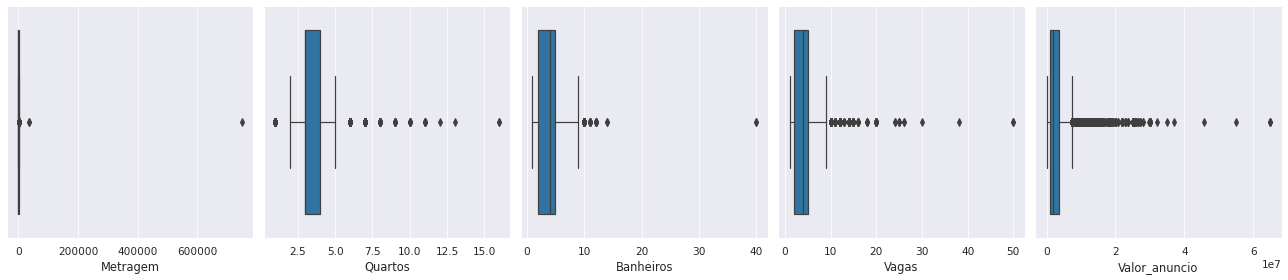

In [15]:
# Analisando os valores outliers
cols = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio']
ncols = len(cols)

fig, axes = plt.subplots(1, ncols, figsize = (18, 4))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(data = data_vendas, x = col, ax = ax)

plt.tight_layout()

* Observando os gráficos de boxplot é possível percerber os valores outliers, principalmente na variável 'Metragem'.

In [16]:
# Identificando valores outliers e removendo do dataset (Método Z-Score)
from scipy import stats

z = np.abs(stats.zscore(data_vendas[cols]))
print(z)

       Metragem  Quartos  Banheiros  Vagas  Valor_anuncio
0          0.07     0.53       2.14   0.78           1.00
1          0.01     0.53       0.10   0.02           0.16
2          0.04     0.53       0.41   0.75           0.68
3          0.02     0.43       0.91   0.02           0.60
4          0.04     0.43       0.91   0.75           0.64
...         ...      ...        ...    ...            ...
10002      0.02     0.43       1.12   0.02           0.39
10003      0.04     1.38       0.91   0.75           0.61
10004      0.02     4.34       1.63   0.40           0.19
10005      0.03     0.43       0.41   0.78           0.51
10007      0.04     0.43       0.91   0.75           0.71

[9156 rows x 5 columns]


* **Z-Score:** Nos da uma ideia de quão longe da média o dado está. Tecnicamente falando é a medida de quantos desvios padrão abaixo ou acima da média da populacão o dado está.

In [17]:
# Na maioria dos casos os outliers são indetificados quando o valor de 'z' é maior do que 3, ou seja 3 vezes o valor do desvio padrão.
filtro_zscore = (z < 3).all(axis=1)
data_vendas_filtrado = data_vendas[filtro_zscore]

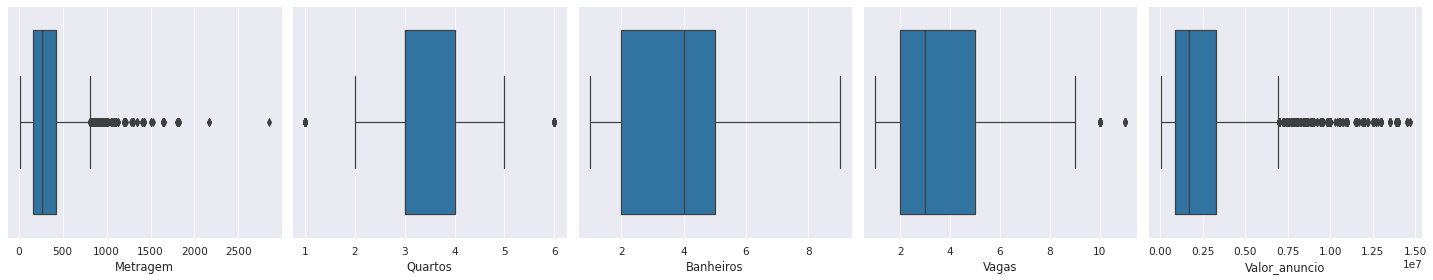

In [18]:
# Visualizando os dados após a remoção dos outliers
fig, axes = plt.subplots(1, ncols, figsize = (20, 4))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(data = data_vendas_filtrado, x = col, ax = ax)

plt.tight_layout()

In [19]:
# Adicionando uma nova coluna ao dataframe para reduzir a escala do valores dos imóveis
data_vendas_filtrado['Valor_anuncio_milhoes'] = data_vendas_filtrado['Valor_anuncio']/1000000

/tmp/ipykernel_136221/2833976463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vendas_filtrado['Valor_anuncio_milhoes'] = data_vendas_filtrado['Valor_anuncio']/1000000


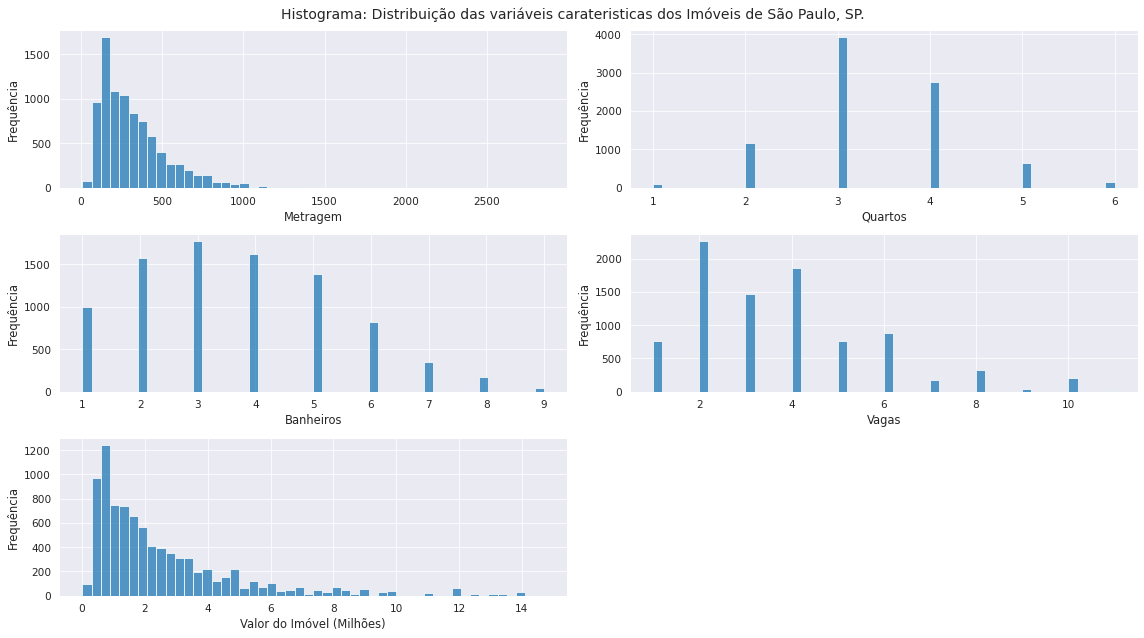

In [20]:
# Visualizando a distribuição de cada variável com os gráficos de histograma
cols = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio_milhoes']

fig, axes = plt.subplots(3, 2, figsize = (16, 9))

for col, ax in zip(cols, axes.flatten()):
    if col != 'Valor_anuncio_milhoes':
        sns.histplot(data = data_vendas_filtrado, x = col, ax = ax, bins = 50)
        ax.set(ylabel = 'Frequência')
    else:
        sns.histplot(data = data_vendas_filtrado, x = col, ax = ax, bins = 50)
        ax.set(xlabel = 'Valor do Imóvel (Milhões)', ylabel = 'Frequência')

fig.suptitle('Histograma: Distribuição das variáveis carateristicas dos Imóveis de São Paulo, SP.', fontsize = 14)
fig.delaxes(axes[2,1])

plt.tight_layout()

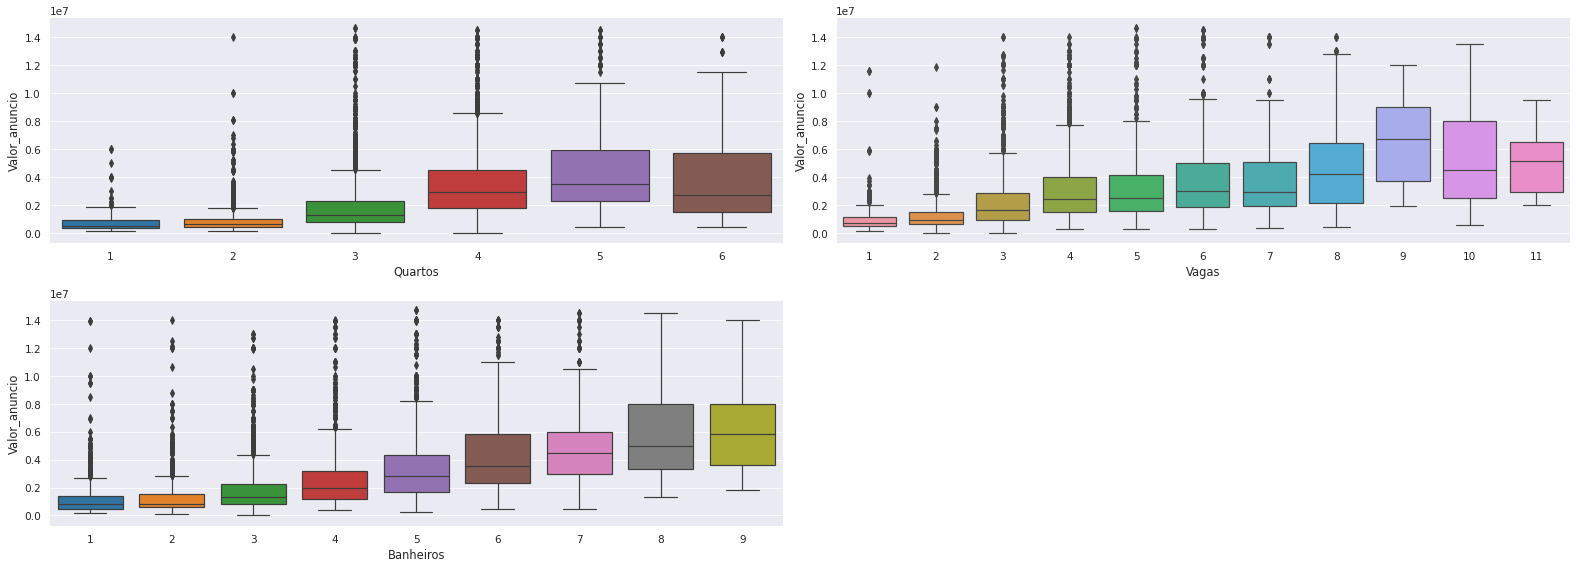

In [21]:
# Visualizando a distribuição das variáveis em relação ao valor dos imóveis
fig, ax = plt.subplots(2,2, figsize = (22,8))

sns.boxplot(data= data_vendas_filtrado, x = 'Quartos',   y = 'Valor_anuncio', ax = ax[0,0])
sns.boxplot(data= data_vendas_filtrado, x = 'Vagas',     y = 'Valor_anuncio', ax = ax[0,1])
sns.boxplot(data= data_vendas_filtrado, x = 'Banheiros', y = 'Valor_anuncio', ax = ax[1,0])

fig.delaxes(ax[1,1])
fig.tight_layout()

In [22]:
# Preço do metro quadrado por bairro
metragem_valor = data_vendas_filtrado.groupby('Bairro').sum()
metragem_valor = metragem_valor.assign(valor_m2 = lambda x: (x['Valor_anuncio']/x['Metragem']))
metragem_valor

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_milhoes,valor_m2
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,139.29,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,5708.74
Alto da Lapa,23075,242,294,296,162653500.00,162.65,7048.91
Alto da Mooca,5401,66,52,73,23683400.00,23.68,4385.00
Alto de Pinheiros,146621,1344,1652,1609,1582070915.00,1582.07,10790.21
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,3.26,4283.84
Água Branca,2083,37,39,27,14718000.00,14.72,7065.77
Água Fria,1985,34,41,30,11125000.00,11.12,5604.53


In [23]:
metragem_valor.index

Index(['Aclimação', 'Alto da Boa Vista', 'Alto da Lapa', 'Alto da Mooca',
       'Alto de Pinheiros', 'Aricanduva', 'Balneário Mar Paulista',
       'Barra Funda', 'Barro Branco (Zona Norte)', 'Bela Aliança',
       ...
       'Vila das Mercês', 'Vila do Bosque', 'Vila do Castelo',
       'Vila do Encontro', 'Vila dos Remédios', 'Vila Água Funda',
       'Água Branca', 'Água Fria', 'Água Funda', 'Água Rasa'],
      dtype='object', name='Bairro', length=691)

In [51]:
fig = px.scatter(metragem_valor, x = 'Metragem', y = 'Valor_anuncio_milhoes', hover_name = metragem_valor.index, size = 'valor_m2',
                                    size_max = 60, log_x= True)

fig.show()

### **Desafios da Aula 1**

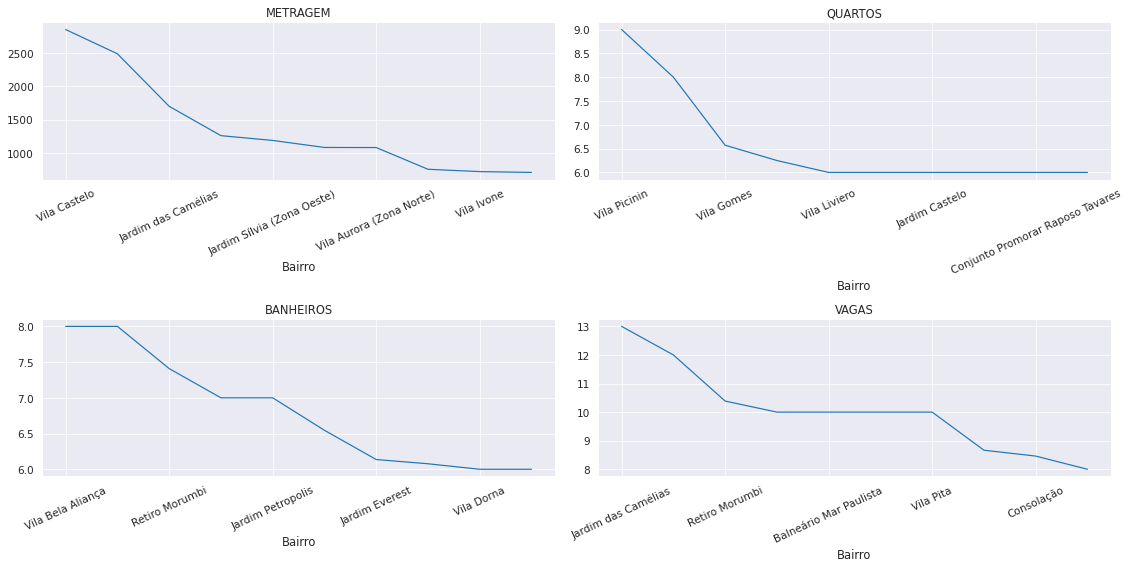

In [25]:
# 1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo) + quartos, vagas e banheiros
'''Foram selecionandos apenas os 10 bairros com as maiores medias por conta do grande numero de bairros'''
media_metragem_bairro = data.groupby('Bairro').mean()

cols = list(media_metragem_bairro.columns)

for n, col in enumerate(cols):

  ax = plt.subplot(2,2, n + 1)

  (media_metragem_bairro[col]
   .sort_values(ascending= False)[1:11]  # exclusao de possiveis outliers
   .plot(figsize = (16,8), ax = ax))
  
  ax.set_title(col.upper())
  ax.tick_params(axis = 'x', rotation = 25)

plt.tight_layout()

In [26]:
# 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

# Query 1:
tem_imoveis_vila = data['Bairro'] == 'Vila Mariana'
data[tem_imoveis_vila]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000,R$,1.350.000,None
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000,R$,2.450.000,None
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000,R$,1.490.000,None
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000,R$,2.200.000,None
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000,R$,1.700.000,None
...,...,...,...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000,R$,1.650.000,None
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000,R$,1.500.000,None


In [27]:
# Query 2:
data[data['Bairro'] == 'Vila Mariana']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000,R$,1.350.000,None
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000,R$,2.450.000,None
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000,R$,1.490.000,None
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000,R$,2.200.000,None
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000,R$,1.700.000,None
...,...,...,...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000,R$,1.650.000,None
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000,R$,1.500.000,None


In [28]:
# Query 3:
data.query("Bairro == 'Vila Mariana'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000,R$,1.350.000,None
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000,R$,2.450.000,None
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000,R$,1.490.000,None
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000,R$,2.200.000,None
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000,R$,1.700.000,None
...,...,...,...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000,R$,1.650.000,None
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000,R$,1.500.000,None
